Assalamualaikum Saya Disini Akan Menjelaskan Tentang Tugas Pertemuan 3

Nama = Baihaqi Nur Muhammad

NPM  = 24083010111

Kelas= Analisis Numerik A


Disini Saya akan menjelaskan tentang hasil antara metode Regresi Polinomial dan Regresi Fourier (Fourier Series Expansion)
berhubung  data yang kita miliki berbentuk gelombang sinusoidal (periodik), lebih baik menggunakan regresi fourier.

Penjelasan untuk perbedaan antara kedua metode tersebut:
# Polinomial

Kurva yang dihasilkan makin rumit kalau orde makin tinggi.

Namun, meskipun bisa melengkung, polinomial tidak bisa mengulang pola naik-turun seperti sinus.

Akibatnya:

Orde rendah → underfitting (kurva tidak mengikuti pola sama sekali).

Orde tinggi → overfitting (terlalu mengikuti titik, tapi bentuk global tetap tidak periodik).

# Fourier

Dengan orde rendah (misalnya 2–3 saja), sudah bisa menangkap bentuk sinusoidal.

Semakin tinggi orde → semakin halus mendekati fungsi asli.

Cocok untuk semua data periodik, baik sinus murni maupun kombinasi gelombang yang lebih kompleks.

# Metode Polinomial


In [ ]:
# nama:Baihaqi Nur Muhammad
# NPM:24083010111

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

n = 200
NPM = 111



Koefisien polinomial orde 1:
[-0.17590164  0.75247735]

Koefisien polinomial orde 2:
[ 0.02882685 -0.54041344  1.48717767]

Koefisien polinomial orde 3:
[-0.01774696  0.36487979 -2.22168997  3.18570659]

Koefisien polinomial orde 4:
[ 2.41868580e-04 -2.38440445e-02  4.14072976e-01 -2.35760705e+00
  3.26851107e+00]

Koefisien polinomial orde 5:
[-1.29627672e-03  4.09869555e-02 -4.78271419e-01  2.54479452e+00
 -6.14109994e+00  4.82424276e+00]


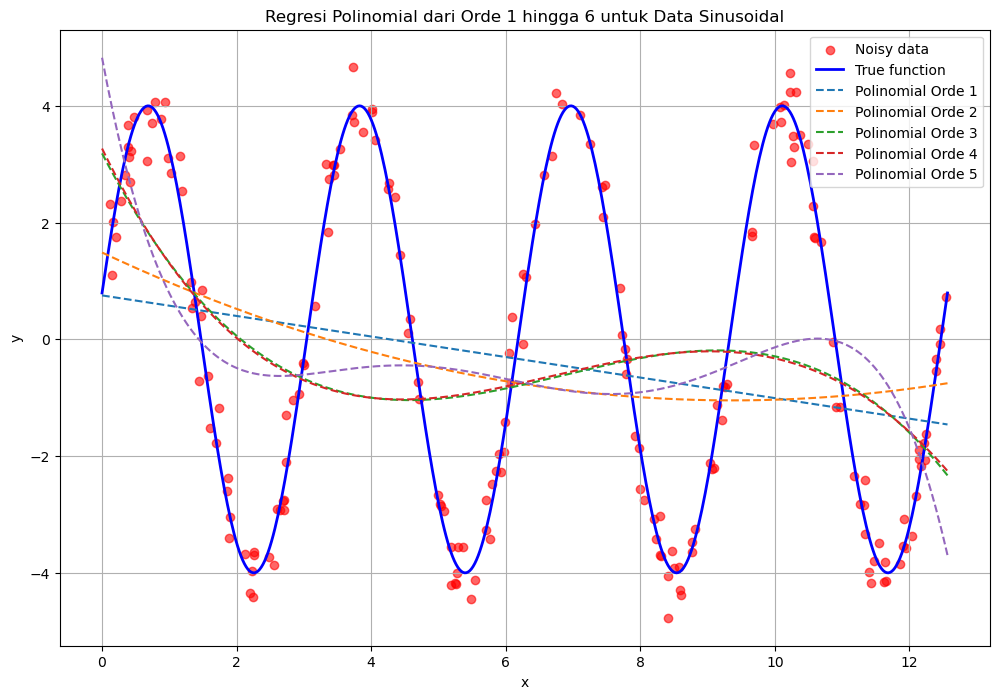

In [38]:
# nilai x acak dari 0 hingga 4 pi
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)

# funsgi asli
y_true = 4 * np.sin(2*x + 0.2)

# tambahkan gaussian noise
noise = np.random.normal(0, 0.4, n)  
y_noisy = y_true + noise
all_coefficients = {}

# buat figure untuk plot
plt.figure(figsize=(12, 8))

# plotting noisy data dan fungsi asli
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)
x_true_plot = np.linspace(0, 4 * np.pi, 500)
plt.plot(x_true_plot, 4 * np.sin(2 * x_true_plot + 0.2), label="True function", color="blue", linewidth=2)

# loopoing urutan polinomial dari orde 1 sampai 4
for order in range(1,6):
    # memunjukkan regresi polinomial
    coefficients = np.polyfit(x, y_noisy, order)
    all_coefficients[order] = coefficients

    # Create a polynomial function from the coefficients membuat fungsi polinomial dari koefisien
    poly_function = np.poly1d(coefficients)

    # Generate points for the fitted curve membuat poin untuk fitted curve
    x_plot = np.linspace(0, 4*np.pi, 500)
    y_fitted = poly_function(x_plot)

    # plotting untuk curva yang terisi
    plt.plot(x_plot, y_fitted, label=f'Polinomial Orde {order}', linestyle='--')

# untuk masukin label
plt.title('Regresi Polinomial dari Orde 1 hingga 6 untuk Data Sinusoidal')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.savefig('polynomial_regression_orders_1_to_5.png')

# memunculkan koefisien dari setiap order
for order, coeffs in all_coefficients.items():
    print(f"\nKoefisien polinomial orde {order}:")
    print(coeffs)

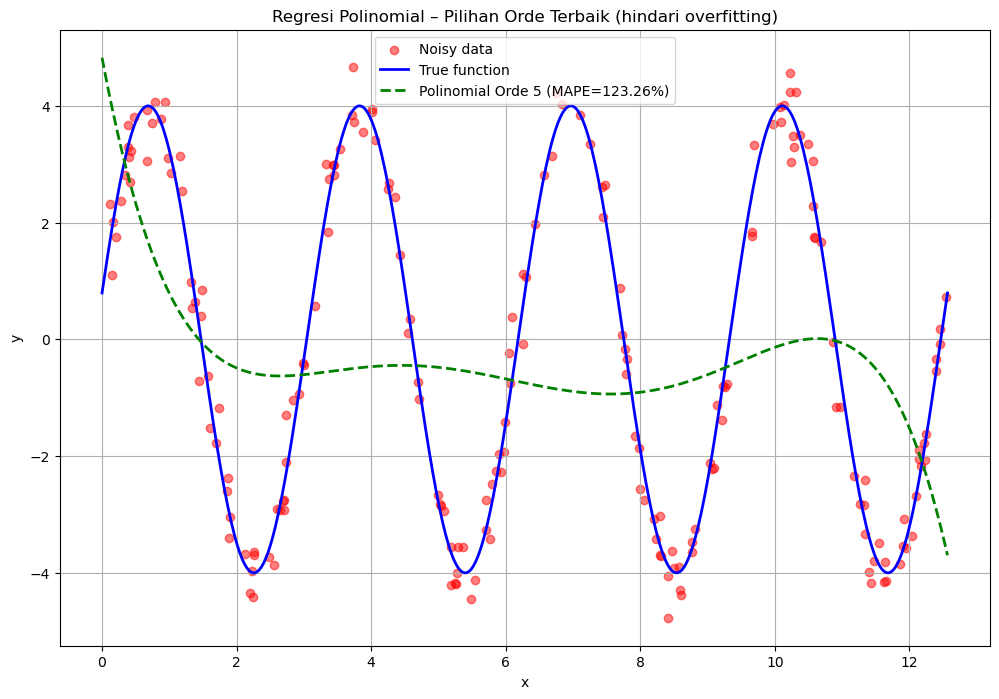

Hasil MAPE untuk tiap orde:
Orde 1: MAPE = 125.62%
Orde 2: MAPE = 127.47%
Orde 3: MAPE = 128.04%
Orde 4: MAPE = 126.64%
Orde 5: MAPE = 123.26%

✅ Orde terbaik: 5 dengan MAPE = 123.26%


In [42]:



# nilai x acak dari 0 hingga 4 pi
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)

# fungsi asli
y_true = 4 * np.sin(2*x + 0.2)

# tambahkan gaussian noise
noise = np.random.normal(0, 0.4, n)  
y_noisy = y_true + noise

all_coefficients = {}
all_mape = {}

# range orde polinomial yang diuji (1 s/d 10 biar aman)
orders = range(1, 6)

# cari orde terbaik berdasarkan MAPE
best_order = None
best_mape = float("inf")

for order in orders:
    coeffs = np.polyfit(x, y_noisy, order)
    poly_func = np.poly1d(coeffs)
    y_pred = poly_func(x)
    
    mape = mean_absolute_percentage_error(y_true, y_pred) * 100
    all_coefficients[order] = coeffs
    all_mape[order] = mape
    
    if mape < best_mape:
        best_mape = mape
        best_order = order

# --- Plot hasil ---
plt.figure(figsize=(12, 8))

# noisy data
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.5)

# fungsi asli
x_true_plot = np.linspace(0, 4*np.pi, 500)
plt.plot(x_true_plot, 4 * np.sin(2 * x_true_plot + 0.2), 
         label="True function", color="blue", linewidth=2)

# fitted curve dengan orde terbaik
best_coeffs = all_coefficients[best_order]
best_poly = np.poly1d(best_coeffs)
y_fitted_best = best_poly(x_true_plot)

plt.plot(x_true_plot, y_fitted_best, 
         label=f'Polinomial Orde {best_order} (MAPE={best_mape:.2f}%)',
         color="green", linewidth=2, linestyle="--")

plt.title("Regresi Polinomial – Pilihan Orde Terbaik (hindari overfitting)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# --- Print hasil ---
print("Hasil MAPE untuk tiap orde:")
for order, mape in all_mape.items():
    print(f"Orde {order}: MAPE = {mape:.2f}%")

print(f"\n✅ Orde terbaik: {best_order} dengan MAPE = {best_mape:.2f}%")


# Penjelasan Metode Polinomial

Berdasarkan hasil ujipercobaan saya untuk regresi polinomial terhadap data sinusoidal ber-noise, diperoleh bahwa model polinomial dengan orde rendah (orde 1–2) cenderung mengalami underfitting karena hanya mampu menangkap tren umum tanpa mengikuti pola gelombang yang berulang. Pada orde yang lebih tinggi (orde 3–5), model mulai menunjukkan fleksibilitas yang lebih baik, namun tetap tidak mampu merepresentasikan sifat periodik secara akurat dan berpotensi mengalami overfitting. Evaluasi menggunakan MAPE menunjukkan nilai kesalahan relatif yang tinggi (≥ 120%), dengan nilai terbaik ditunjukkan oleh orde 5 sebesar 123,26%. Tingginya nilai MAPE terutama dipengaruhi oleh karakteristik fungsi sinusoidal yang sering melintasi titik nol, sehingga MAPE bukan metrik evaluasi yang tepat untuk kasus ini.

# Metode Fourier

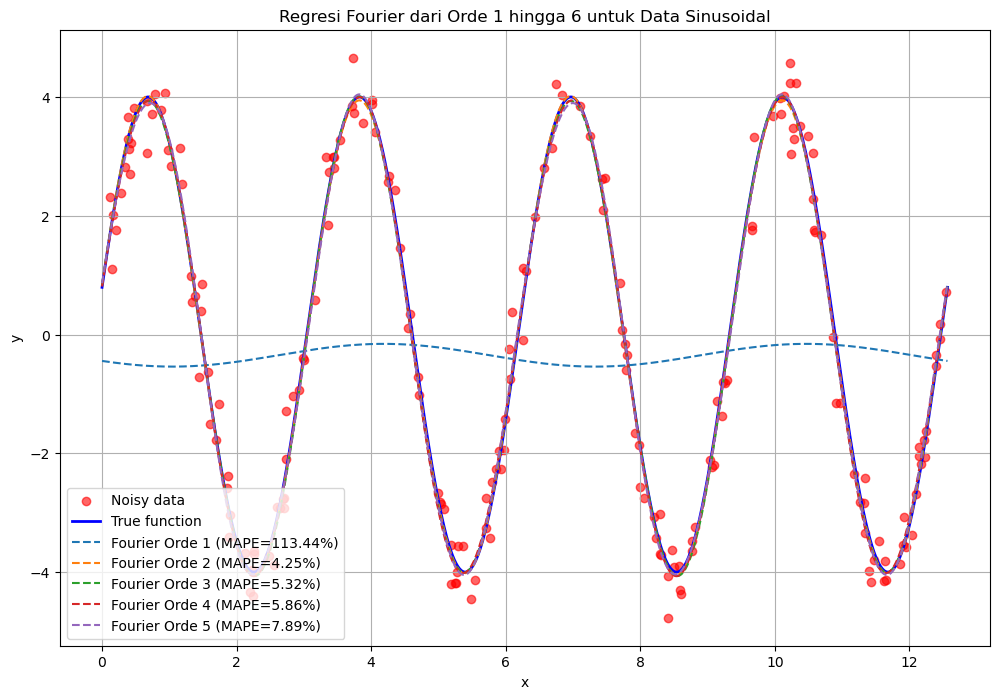


Koefisien Fourier Orde 1:
[-0.34881895 -0.096021   -0.16571626]

Koefisien Fourier Orde 2:
[-0.02713469  0.03483342  0.01340939  0.82434855  3.91898118]

Koefisien Fourier Orde 3:
[-0.03148958  0.02748756  0.0145987   0.82904013  3.91680025  0.0101359
 -0.07199359]

Koefisien Fourier Orde 4:
[-0.0324091   0.03092355  0.01797475  0.82204887  3.91802197  0.00795195
 -0.06844824 -0.01920684 -0.05183109]

Koefisien Fourier Orde 5:
[-0.0331402   0.0310588   0.0189225   0.81983609  3.91905433  0.01051156
 -0.06867115 -0.01839956 -0.05276334  0.05355208 -0.01787065]


In [43]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# jumlah data
n = 200
NPM = 111

# nilai x acak dari 0 hingga 4 pi
np.random.seed(NPM)
x = np.random.uniform(0, 4*np.pi, n)

# fungsi asli
y_true = 4 * np.sin(2*x + 0.2)

# tambahkan gaussian noise
noise = np.random.normal(0, 0.4, n)
y_noisy = y_true + noise

# fungsi untuk membangun basis Fourier (orde n)
def fourier_design_matrix(x, order):
    X = [np.ones_like(x)]  # konstanta a0
    for k in range(1, order+1):
        X.append(np.cos(k*x))
        X.append(np.sin(k*x))
    return np.vstack(X).T

# Buat figure
plt.figure(figsize=(12, 8))
plt.scatter(x, y_noisy, label="Noisy data", color="red", alpha=0.6)

# fungsi asli untuk referensi
x_plot = np.linspace(0, 4*np.pi, 1000)
plt.plot(x_plot, 4 * np.sin(2*x_plot + 0.2), label="True function", color="blue", linewidth=2)

# simpan koefisien dan error tiap orde
all_coeffs = {}

# loop orde Fourier dari 1 sampai 6
for order in range(1, 6):
    # Bangun design matrix
    X_design = fourier_design_matrix(x, order)
    
    # cari koefisien dengan least squares
    coeffs, _, _, _ = np.linalg.lstsq(X_design, y_noisy, rcond=None)
    all_coeffs[order] = coeffs
    
    # evaluasi hasil pada x_plot
    X_plot_design = fourier_design_matrix(x_plot, order)
    y_fit = X_plot_design @ coeffs
    
    # hitung MAPE terhadap fungsi asli
    y_eval = fourier_design_matrix(x, order) @ coeffs
    mape = mean_absolute_percentage_error(y_true, y_eval) * 100
    
    # plotting
    plt.plot(x_plot, y_fit, linestyle="--", label=f"Fourier Orde {order} (MAPE={mape:.2f}%)")

plt.title("Regresi Fourier dari Orde 1 hingga 6 untuk Data Sinusoidal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# tampilkan koefisien tiap orde
for order, coeffs in all_coeffs.items():
    print(f"\nKoefisien Fourier Orde {order}:")
    print(coeffs)


# Penjelasan Metode Fourier:

Hasil uji percobaan saya menunjukkan bahwa regresi Fourier mampu mempresentasikan data sinusoidal secara lebih akurat dibandingkan regresi polinomial. Model dengan orde rendah (orde 1) terbukti kurang memadai karena hanya menangkap pola umum dan menghasilkan tingkat kesalahan yang tinggi, sedangkan pada orde menengah (orde 2–3) kurva yang dihasilkan sudah sangat mendekati fungsi asli. Nilai MAPE terbaik diperoleh pada orde 2 sebesar 4,25%, yang menandakan tingkat kesalahan relatif sangat kecil. Hal ini membuktikan bahwa regresi Fourier, dengan basis fungsi sinus dan cosinus, lebih sesuai digunakan untuk memodelkan data periodik ber-noise dibandingkan pendekatan polinomial.